In [12]:
%load_ext autoreload
%autoreload 2
import espaloma as esp
import torch
import pinot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
g = esp.Graph('C')

forcefield = esp.graphs.legacy_force_field.LegacyForceField(
    "smirnoff99Frosst"
)

forcefield.parametrize(g)

from espaloma.data.md import MoleculeVacuumSimulation
simulation = MoleculeVacuumSimulation(
    n_samples=100,
    n_steps_per_sample=10,
)
simulation.run(g)

/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/dgl/base.py:25: UserWarning: Currently adjacency_matrix() returns a matrix with destination as rows by default.  In 0.5 the result will have source as rows (i.e. transpose=True)
  warnings.warn(msg, warn_type)


In [14]:
esp.mm.geometry.geometry_in_graph(g.heterograph)
esp.mm.energy.energy_in_graph(g.heterograph, suffix='_ref')

Graph(num_nodes={'n1': 5, 'n2': 8, 'n3': 12, 'n4': 0, 'nonbonded': 0, 'onefour': 0, 'g': 1},
      num_edges={('n1', 'n1_neighbors_n1', 'n1'): 8, ('n1', 'n1_as_0_in_n2', 'n2'): 8, ('n2', 'n2_has_0_n1', 'n1'): 8, ('n1', 'n1_as_1_in_n2', 'n2'): 8, ('n2', 'n2_has_1_n1', 'n1'): 8, ('n1', 'n1_as_0_in_n3', 'n3'): 12, ('n3', 'n3_has_0_n1', 'n1'): 12, ('n1', 'n1_as_1_in_n3', 'n3'): 12, ('n3', 'n3_has_1_n1', 'n1'): 12, ('n1', 'n1_as_2_in_n3', 'n3'): 12, ('n3', 'n3_has_2_n1', 'n1'): 12, ('n1', 'n1_as_0_in_n4', 'n4'): 0, ('n4', 'n4_has_0_n1', 'n1'): 0, ('n1', 'n1_as_1_in_n4', 'n4'): 0, ('n4', 'n4_has_1_n1', 'n1'): 0, ('n1', 'n1_as_2_in_n4', 'n4'): 0, ('n4', 'n4_has_2_n1', 'n1'): 0, ('n1', 'n1_as_3_in_n4', 'n4'): 0, ('n4', 'n4_has_3_n1', 'n1'): 0, ('n2', 'n2_as_0_in_n3', 'n3'): 12, ('n3', 'n3_has_0_n2', 'n2'): 12, ('n2', 'n2_as_1_in_n3', 'n3'): 12, ('n3', 'n3_has_1_n2', 'n2'): 12, ('n2', 'n2_as_0_in_n4', 'n4'): 0, ('n4', 'n4_has_0_n2', 'n2'): 0, ('n2', 'n2_as_1_in_n4', 'n4'): 0, ('n4', 'n4_has_1_n

In [15]:
x = g.nodes['n2'].data['x'].flatten()
x1_2 = (x - 0.0).pow(2)
x2_2 = (x - 0.3).pow(2)
x_ = torch.stack(
    [
        x1_2.flatten(),
        x2_2.flatten(),
        torch.ones_like(x2_2.flatten(),)
    ],
    dim=1
).detach()
y_ = (284512 * (x.detach() - 0.1090) ** 2)
# beta = (x_.t() @ x_).inverse() @ x_.t() @ y_[:, None]



In [17]:
beta = torch.nn.Parameter(
    torch.rand(3, 1)
)

optimizer = torch.optim.LBFGS([beta], 1e-1, line_search_fn='strong_wolfe')

for _ in range(10000):
    def l():
        optimizer.zero_grad()
        y_hat = x_ @ beta
        loss = torch.nn.MSELoss()(
            y_.flatten(),
            y_hat.flatten()
        )
        loss.backward()
        print(loss)
        return loss
    
    optimizer.step(l)
    

tensor(5.2852, grad_fn=<MeanBackward0>)
tensor(5.0250, grad_fn=<MeanBackward0>)
tensor(3.5049, grad_fn=<MeanBackward0>)
tensor(3.4658, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)
tensor(3.2987, grad_fn=<MeanBackward0>)


KeyboardInterrupt: 

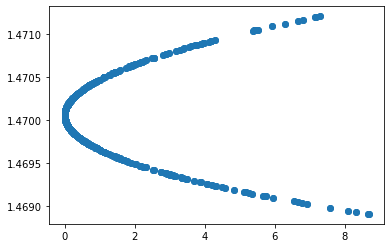

In [18]:
from matplotlib import pyplot as plt
plt.scatter(
    # x.flatten().detach(),
    # x1_2.detach().flatten(),
    y_.detach(),
    (x_ @ beta).detach(),
)

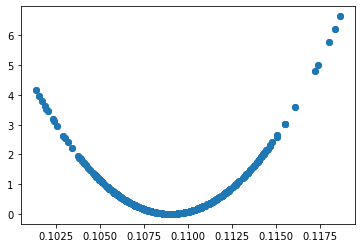

In [135]:
plt.scatter(
    g.nodes['n2'].data['x'].flatten().detach(),
    g.nodes['n2'].data['u_ref'].flatten().detach()
)g